This is an interactive demo, not intended for proper viewing on a static page.

Here we discussed one of the most fundamental problems in statistical mechanics, the random walk. Just think that after a WVU football game and a huge amount of alcohol, you decide to go back to your home. The question if you start from the bus stop, how far can you go?... in a more physical example, this is the main concept in diffusion. 

In [1]:
import random

In [2]:
random.seed(None)

VPython example (does not run in notebook):

```python
import vpython as vp
jmax = 100
x = 0.0
y = 0.0
pts = vp.gcurve()
pts.plot(pos=(x,y))
         
for i in range(0, jmax+1):
    x += (random.random() - 0.5)*2
    y += (random.random() - 0.5)*2
    pts.plot(pos=(x,y))
    vp.rate(5)
```

In [3]:
# Uncomment if in widget mode available
%matplotlib widget

In [4]:
import matplotlib.pyplot as plt
import time
import numpy as np

In [5]:
fig, ax = plt.subplots()
line, = plt.plot([0], [0], '.-')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [6]:
jmax = 100
x = 0.0
y = 0.0
plt.ion()

for i in range(0, jmax+1):
    x += (random.random() - 0.5)*2
    y += (random.random() - 0.5)*2
    xs, ys = line.get_data()
    xs = np.append(xs, [x])
    ys = np.append(ys, [y])
    line.set_data(xs, ys)
    time.sleep(.2)
    print(i, end=" ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

In [9]:
%matplotlib inline

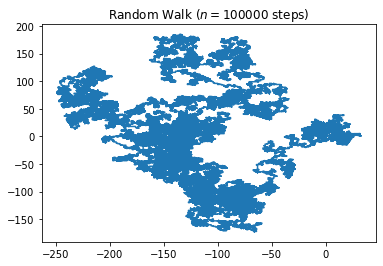

In [10]:
#using Matplotlib
  
# defining the number of steps 
n = 100000
  
#creating two array for containing x and y coordinate 
#of size equals to the number of size and filled up with 0's 
x = np.zeros(n) 
y = np.zeros(n) 
  
# filling the coordinates with random variables 
for i in range(1, n): 
    val = random.randint(1, 4) 
    if val == 1: 
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1] 
    elif val == 2: 
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1] 
    elif val == 3: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] + 1
    else: 
        x[i] = x[i - 1] 
        y[i] = y[i - 1] - 1
      
  
# plotting stuff: 
plt.title("Random Walk ($n = " + str(n) + "$ steps)") 
plt.plot(x, y) 
#plt.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600) 
plt.show() 


Populating the interactive namespace from numpy and matplotlib


Text(0.5, 0.92, '3D Random Walk')

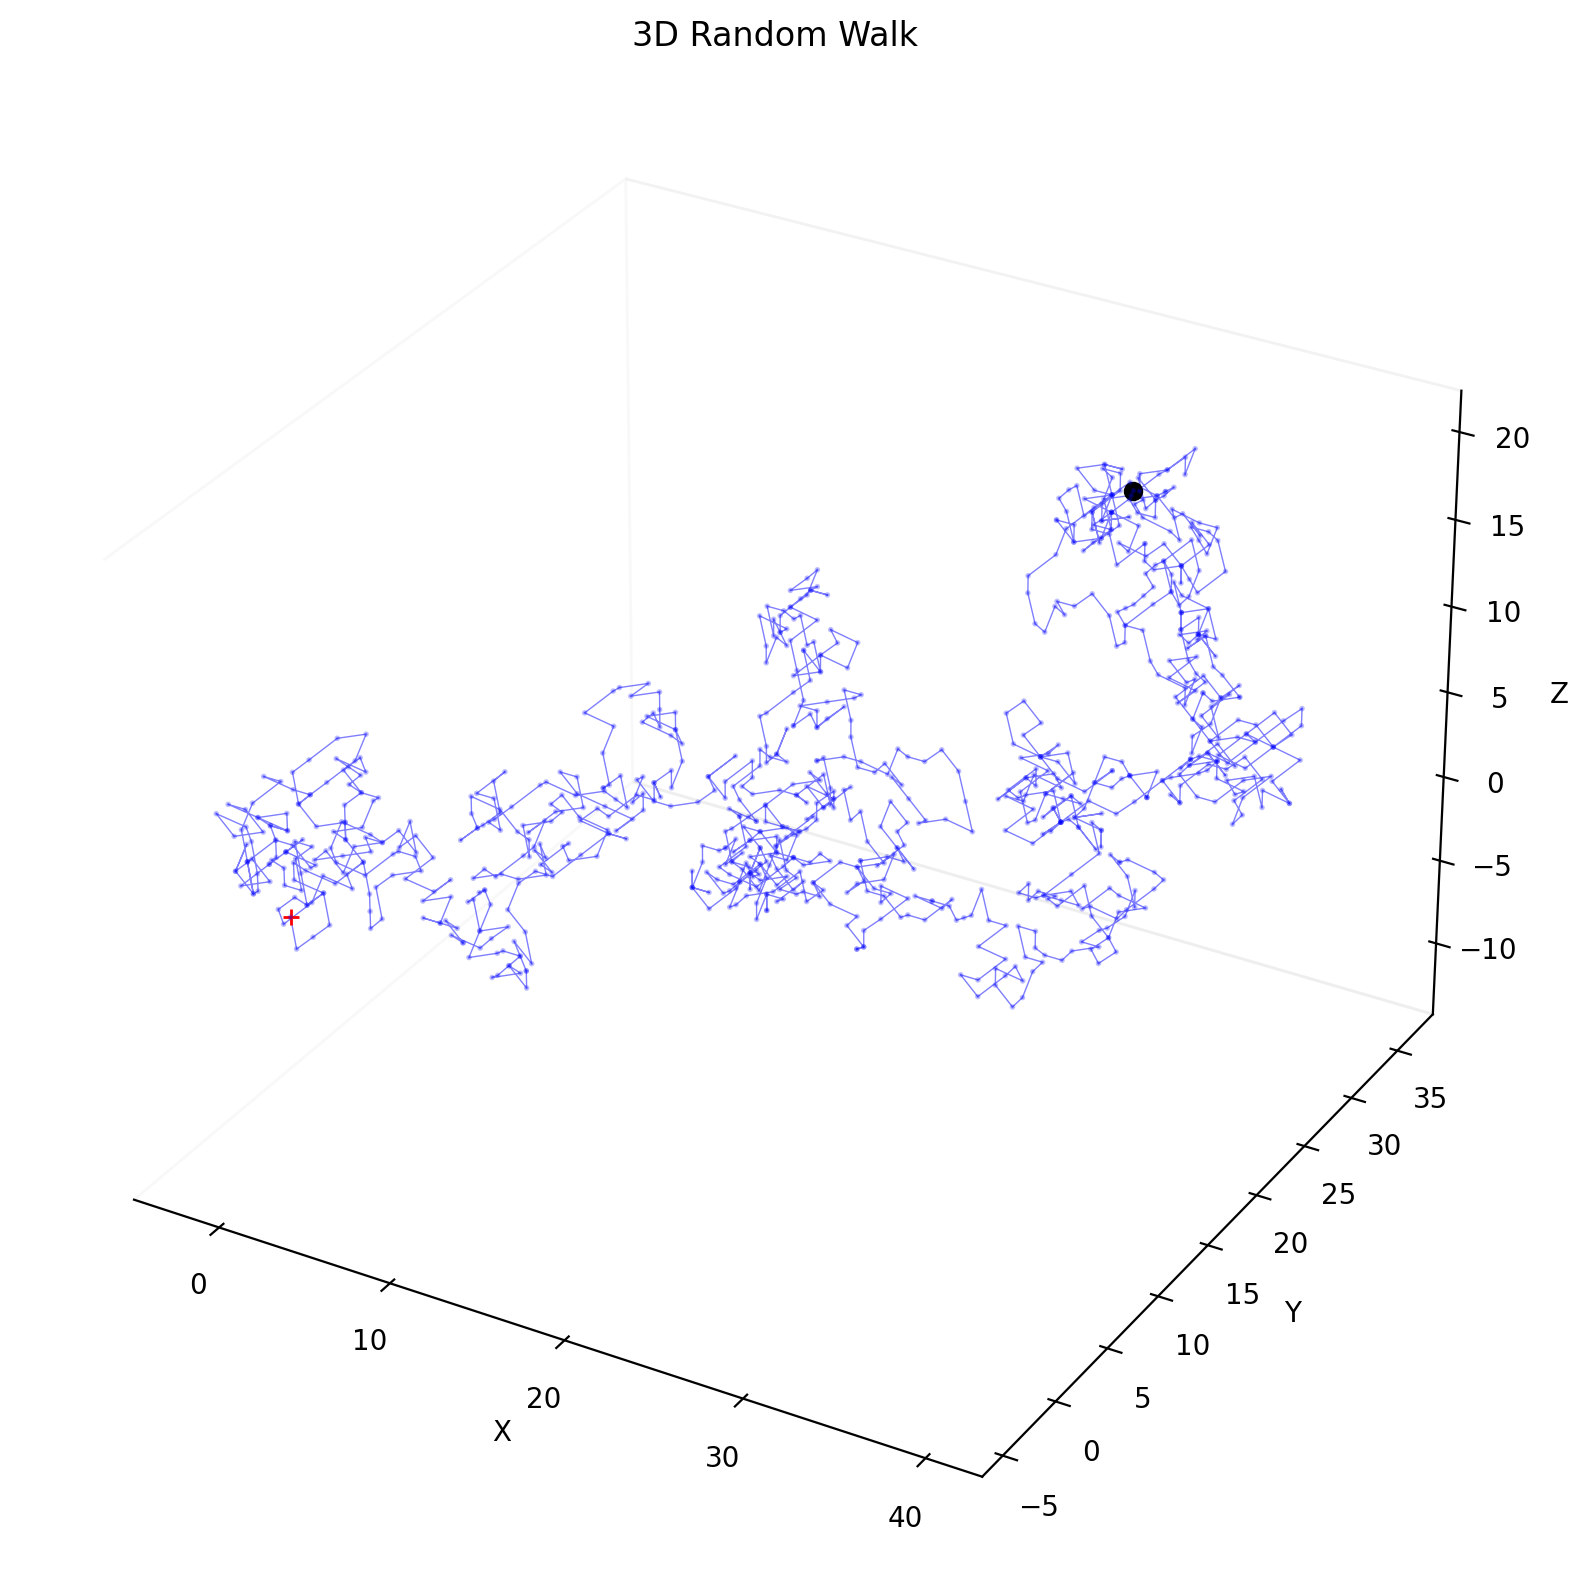

In [16]:
%pylab inline

from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')



# Define parameters for the walk
dims = 3
step_n = 1000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))

# Simulate steps in 3D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]
# Plot the path
fig = plt.figure(figsize=(10,10),dpi=200)

ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter3D(path[:,0], path[:,1], path[:,2], 
             c='blue', alpha=0.25,s=1)
ax.plot3D(path[:,0], path[:,1], path[:,2], 
          c='blue', alpha=0.5, lw=0.5)
ax.plot3D(start[:,0], start[:,1], start[:,2], 
          c='red', marker='+')
ax.plot3D(stop[:,0], stop[:,1], stop[:,2], 
          c='black', marker='o')
plt.title('3D Random Walk')
#plt.savefig(‘plots/random_walk_3d.png’,dpi=250);

Text(0.5, 0.92, '3D Random Walk - Multiple runs')

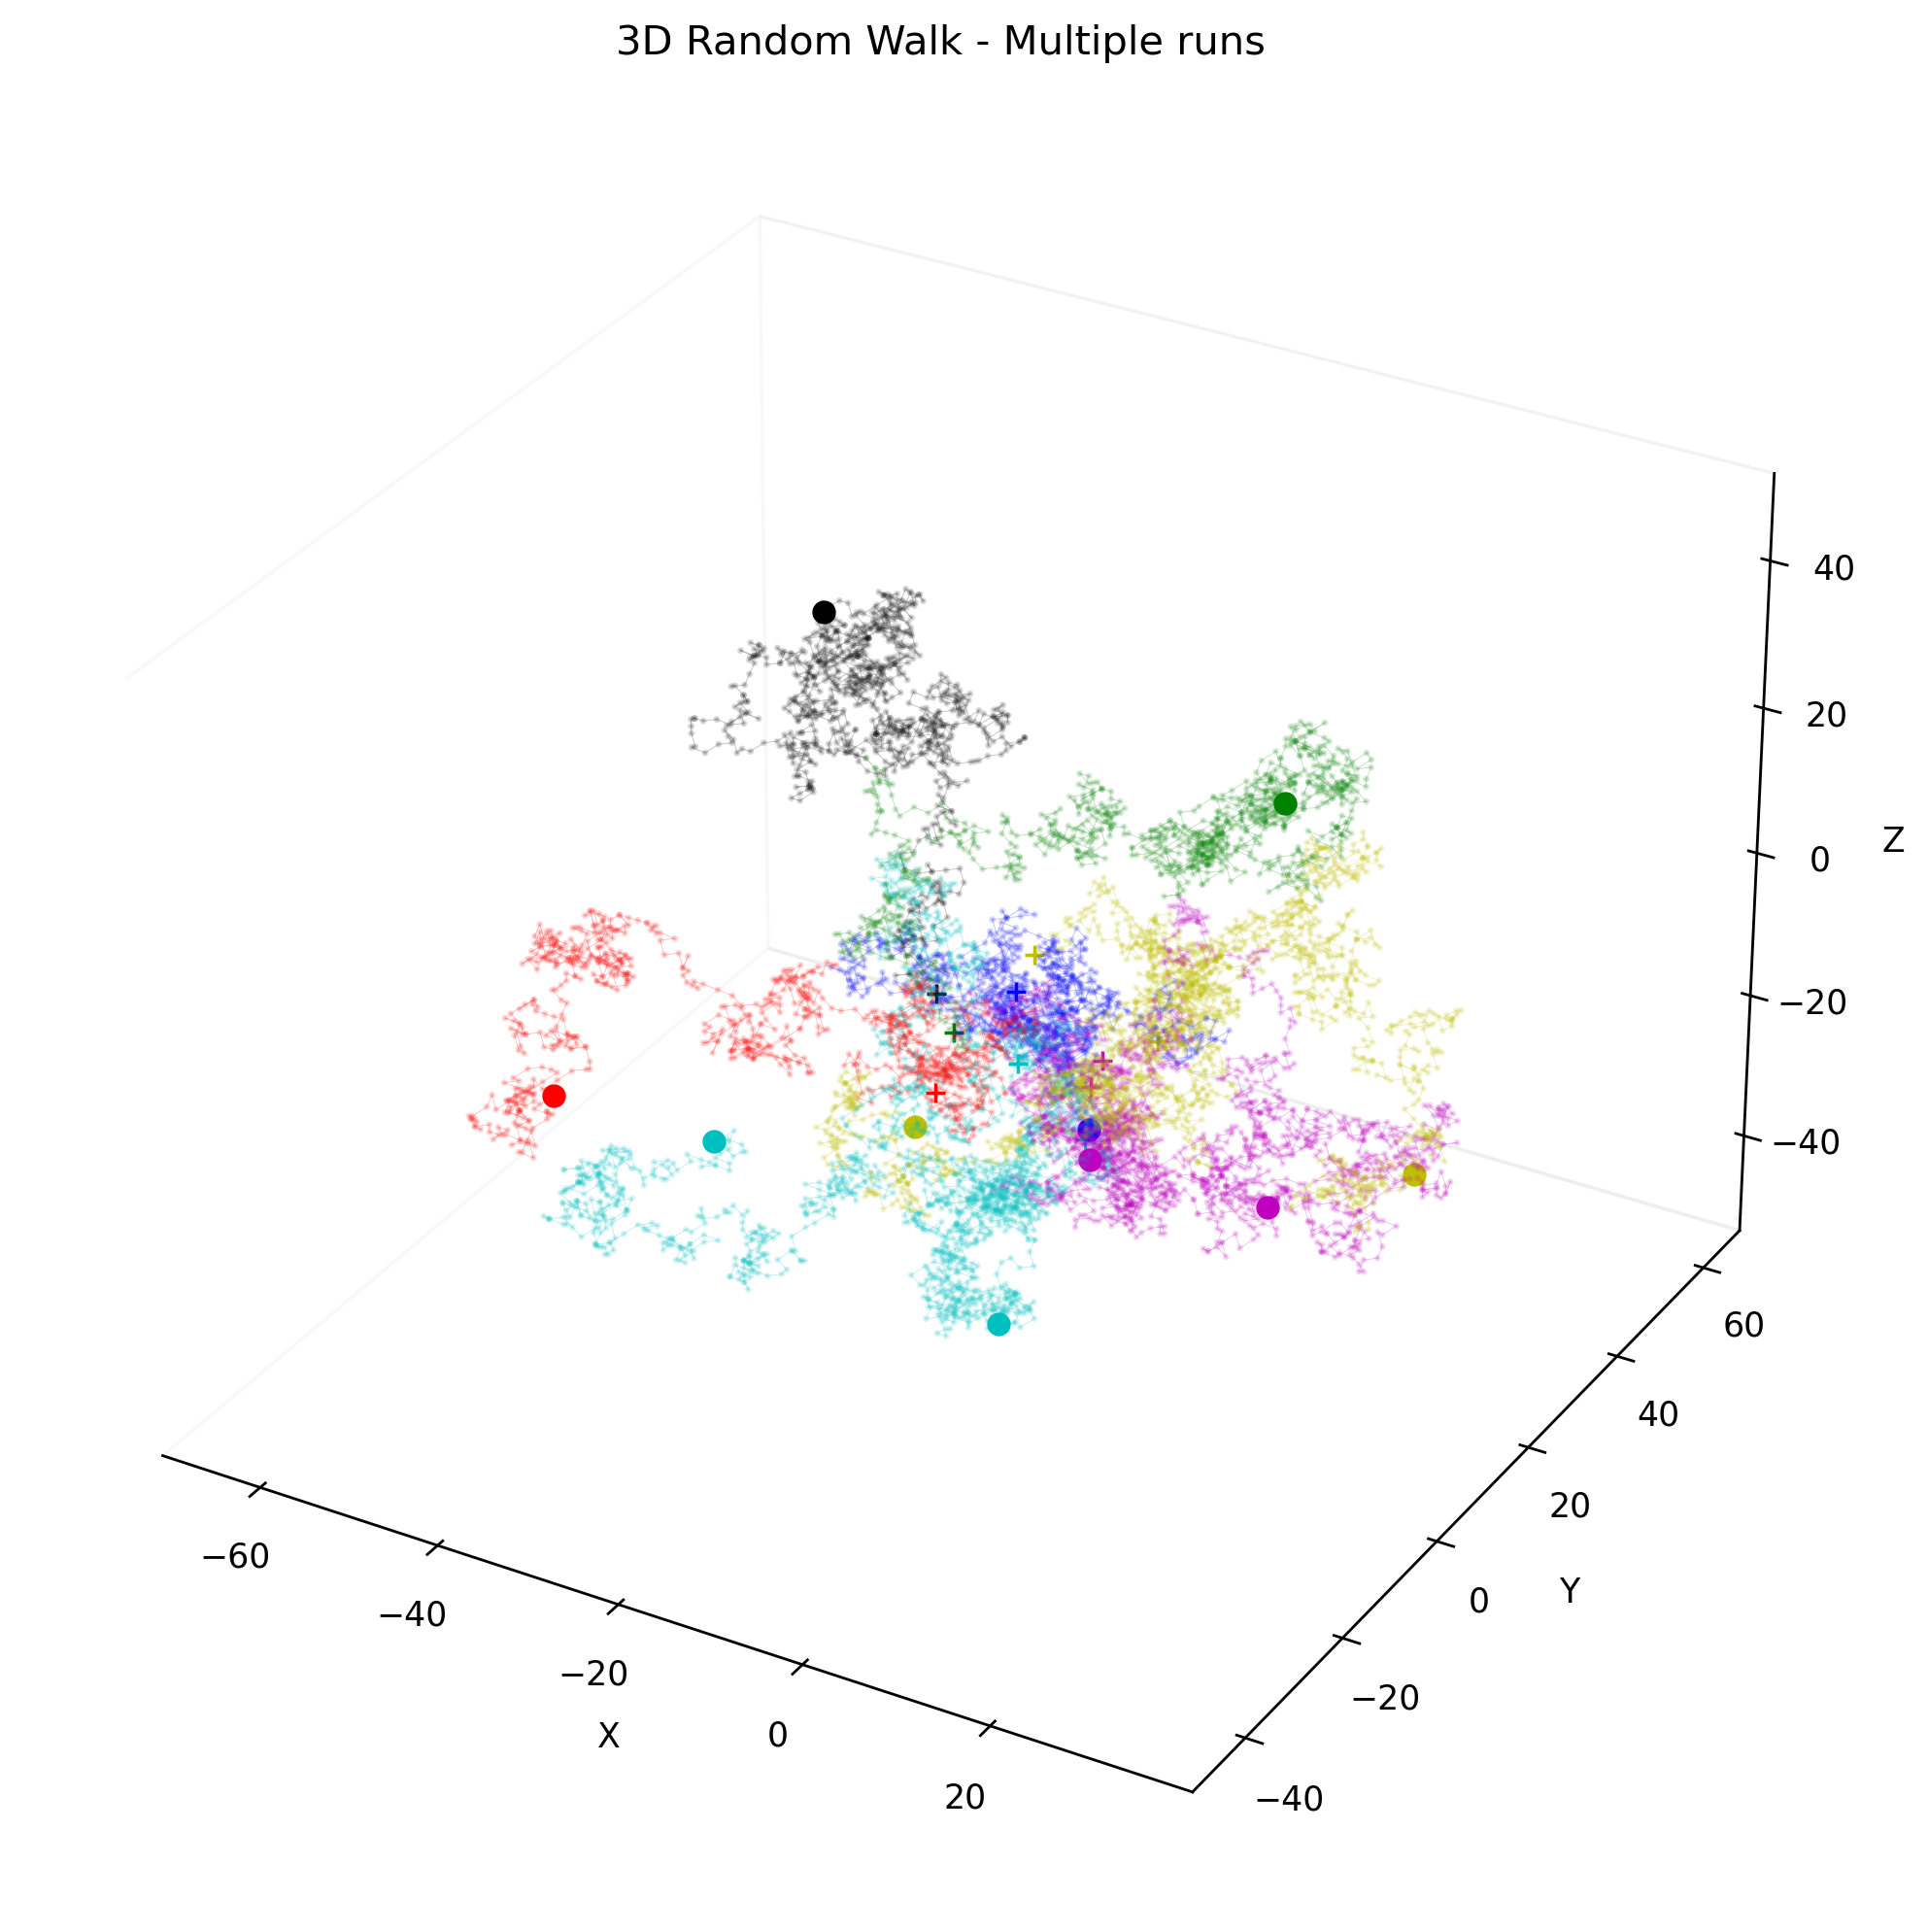

In [18]:
# Define parameters for the walk
dims = 3
n_runs = 10
step_n = 1000
step_set = [-1, 0 ,1]
runs = np.arange(n_runs)
step_shape = (step_n,dims)
# Plot
fig = plt.figure(figsize=(10,10),dpi=250)
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
 
for i, col in zip(runs, colors):
    # Simulate steps in 3D
    origin = np.random.randint(low=-10,high=10,size=(1,dims))
    steps = np.random.choice(a=step_set, size=step_shape)
    path = np.concatenate([origin, steps]).cumsum(0)
    start = path[:1]
    stop = path[-1:]
    # Plot the path
    ax.scatter3D(path[:,0], path[:,1], path[:,2],
                 c=col,alpha=0.15,s=1);
    ax.plot3D(path[:,0], path[:,1], path[:,2], 
              c=col, alpha=0.25,lw=0.25)
    ax.plot3D(start[:,0], start[:,1], start[:,2],
              c=col, marker='+')
    ax.plot3D(stop[:,0], stop[:,1], stop[:,2],
              c=col, marker='o');

plt.title('3D Random Walk - Multiple runs')
#plot.show()
#plt.savefig(‘plots/random_walk_3d_multiple_runs.png’,dpi=250);